In [1]:
rm(list=ls())

In [2]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,610585,32.7,1320457,70.6,1262551,67.5
Vcells,1141177,8.8,8388608,64.0,1821309,13.9


In [3]:
# Uncomment and run to install packages if needed
# install.packages("tidyverse") 
# install.packages("cluster")
# install.packages("forecast")
# install.packages("Metrics")
# install.packages("biglm")
# install.packages("tseries")
# install.packages("scoringutils")

In [4]:
library(tidyverse)
library(parallel)
library(cluster)
library(forecast)
library(Metrics)
library(biglm)
library(tseries)
library(scoringutils)

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy


Loading required package: DBI

Note: scoringutils 1.0.0 introduces a lot of breaking changes and we apologise for any inconvenience. If you pr

In [5]:
# Create the folders to save results in
res_folder1 <- "Results/Global/Pooled Regression/Full/"
if (!file.exists(res_folder1)) {
 dir.create(res_folder1, recursive=TRUE)
}

res_folder2 <- "Results/Global/Pooled Regression/Highway System/"
if (!file.exists(res_folder2)) {
 dir.create(res_folder2, recursive=TRUE)
}

res_folder3 <- "Results/Global/Pooled Regression/Random Cluster/"
if (!file.exists(res_folder3)) {
 dir.create(res_folder3, recursive=TRUE)
}

res_folder4 <- "Results/Global/Pooled Regression/Catch22 KMeans/"
if (!file.exists(res_folder4)) {
 dir.create(res_folder4, recursive=TRUE)
}

res_folder5 <- "Results/Global/Pooled Regression/TSFeat KMeans/"
if (!file.exists(res_folder5)) {
 dir.create(res_folder5, recursive=TRUE)
}

res_folder6 <- "Results/Global/Pooled Regression/DTW/"
if (!file.exists(res_folder6)) {
 dir.create(res_folder6, recursive=TRUE)
}

# Read in and Subset Data

In [6]:
# Read in all files from the Data/Processed directory, with each highway system going into it's own list of df's
england_fnames <- list.files("Data/Processed/Highways_England/", pattern="*.csv", full.names=TRUE)
england_df_list <- lapply(england_fnames, read_csv)

portland_fnames <- list.files("Data/Processed/Portland/", pattern="*.csv", full.names=TRUE)
portland_df_list <- lapply(portland_fnames, read_csv)

utah_fnames <- list.files("Data/Processed/Utah/", pattern="*.csv", full.names=TRUE)
utah_df_list <- lapply(utah_fnames, read_csv)

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

In [7]:
# Order all dfs by timestamp
england_df_list <- lapply(england_df_list, function(x) x %>% arrange(timestamp))
portland_df_list <- lapply(portland_df_list, function(x) x %>% arrange(timestamp))
utah_df_list <- lapply(utah_df_list, function(x) x %>% arrange(timestamp))    

In [8]:
# Create one master list of dfs
total_df_list <- append(append(england_df_list, portland_df_list), utah_df_list)

In [9]:
# Read in the df with start and end points for each time series
start_end <- read_csv("start_end_points.csv")
starting_points <- start_end$start
ending_points <- start_end$end

Rows: 76 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
# Add a row number field to each time series df
total_df_list <- lapply(total_df_list, function(x) x %>% mutate(rn = row_number()))

In [11]:
# Filter each df down to 12 weeks based on its corresponding start and end point (i.e., start and end row number)
total_df_list_samples <- lapply(1:length(total_df_list), 
                                function(x) total_df_list[[x]] %>% 
                                    filter(rn >= starting_points[x]) %>%
                                    filter(rn <= ending_points[x]))

In [12]:
# Set first 8 weeks for train, next 2 for val, last 2 for test in a new field called train_val_test in each df
total_df_list_samples <- lapply(total_df_list_samples, 
                                function(x) x %>% mutate(rn = row_number()) %>%
                                    mutate(train_val_test = ifelse(rn <= (96*7*8), 
                                                                   "train", 
                                                                   ifelse(rn <= (96*7*10), 
                                                                          "val", 
                                                                          "test")))
                                
                               )

In [13]:
# Create a list of dfs of training and validation samples together, without test
train_val_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test != "test"))

In [14]:
# Create a list of dfs with just training data
train_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test == "train"))

In [15]:
# Create a list of dfs with just validation data
val_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test == "val"))

In [16]:
# Create a list of dfs with just test data
test_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test == "test"))

In [17]:
# Turn these lists of dfs into lists of times series objects of the msts, or multi-seasonal ts, class
# Seasonalitiies are daily and weekly
train_val_samples_ts <- lapply(train_val_samples, 
                               function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

In [18]:
train_samples_ts <- lapply(train_samples,
                           function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

In [19]:
test_samples_ts <- lapply(test_samples,
                          function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

In [20]:
val_samples_ts <- lapply(val_samples,
                         function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

# Functions for Global AR Models

In [21]:
lag_embed <- function(data, lag=1) {
    # This function creates a lag emebedded matrix at the provided lag level. It assumes there is a train_val_test
    # in the input data frame, and returns a list of the training, validaiton, and test data as lag matrices
    
    # Compute the number of rows of test and validation data
    n_test <- nrow(data %>% filter(train_val_test=="test"))
    n_val <- nrow(data %>% filter(train_val_test=="val"))
    
    # Lag embed the entire time series - note we use the input lag+1 to account for the target variable
    embed_mat <- embed(data$total_volume, (lag+1))

    # Get the total numebr of rows in the lag matrix
    n_mat <- nrow(embed_mat)
    
    # Based on the number of rows in the matrix and the number of test and validation samples,
    # compute the indexes which correspond to test and validation
    test_idx <- rev(1:n_mat)[1:n_test]
    val_idx <- rev(1:n_mat)[-c(1:n_test)][1:n_val]
    
    # Remoe the test and val indexes to get the training matrix
    train_mat <- embed_mat[-c(val_idx, test_idx),]
    
    # Filter using the above computed indexes to get the validaiton and test matrices
    val_mat <- embed_mat[val_idx,]
    test_mat <- embed_mat[test_idx,]
    
    # Return a list of the trianing, validation, and test lag-embedded matrices
    return_list <- list("train"=train_mat, "val"=val_mat, "test"=test_mat)
}

In [22]:
global_ar_least_squares <- function(train_list,
                                    val_list=NULL,
                                    return_train_preds=TRUE,
                                    return_val_preds=TRUE,
                                    return_train_means=FALSE,
                                    return_val_means=FALSE,
                                    return_train_residuals=FALSE
                                   ) 
{
    # Function for pooled regression which takes a list of lag embedded training matrices, 
    # an optional list of validation matrices, and various booleans which control the list of returned objects,
    # and creates a linear (pooled) regression model on the training data
    
    # Create a model formula based on the names of the matrix columns
    # This assums that the target variable is in the first column, which is the case if the lag matrices
    # are created using the above lag_embed function
    model_formula <- paste(colnames(train_list[[1]][2:ncol(train_list[[1]])]), collapse='+')   
    model_formula <- paste(paste(colnames(train_list[[1]][1]),model_formula,sep="~"), "1", sep="-")    

    # Using the biglm function, we create an initial linear model using the first matrix in the list
    big_lm_mod <- biglm(as.formula(model_formula), train_list[[1]])    
    # Then, for each additional matrix, we update the model accordingly
    for (ts in 2:length(train_list)){
        big_lm_mod <- update(big_lm_mod, train_list[[ts]])
    }     
    
    # For each matrix in the train list, compute the model's predictions and append to a dataframe
    train_preds <- data.frame()
    for (t in 1:length(train_list)) {
        pred <- data.frame(forec=predict(big_lm_mod, newdata=train_list[[t]]), ts_index=t)
        train_preds <- rbind(train_preds, pred)
    }
    
    # Compute the training performance metrics
    
    # First, initialize an empty list for each of the rmse, mae, and target variable means
    train_rmse_ls <- c()
    train_mae_ls <- c()
    train_means <- c()
    
    # For each time series in our data set:
    for (idx in 1:length(train_list)) {
        
        # Copmute the mean and append to the list of means
        train_mean_i <- mean(train_list[[idx]][,1])
        train_means <- c(train_means, train_mean_i)
        
        # Compute the rmse and append to the list of rmses
        rmse_i <- rmse(train_list[[idx]][,1], (train_preds %>% filter(ts_index==idx))$forec)
        train_rmse_ls <- c(train_rmse_ls, rmse_i)
        
        # Compute the mae and append to the list of maes
        mae_i <- mae(train_list[[idx]][,1], (train_preds %>% filter(ts_index==idx))$forec)
        train_mae_ls <- c(train_mae_ls, mae_i)
    }
    
    # Set the return list to include the model and the rmse and mae list on the training data
    return_list <- list("model"=big_lm_mod, 
                        "train_rmse"=train_rmse_ls, "train_mae"=train_mae_ls)
    
    # Check is a validation list is provided. If it is, compute performance on this data as well
    if (!is.null(val_list)) {

        # Create an empty df to save the predictions in
        val_preds <- data.frame()
        
        # For each matrix in the val list
        for (val_t in 1:length(val_list)) {
            # Compute the predictions
            val_pred <- data.frame(forec=predict(big_lm_mod, newdata=val_list[[val_t]]), ts_index=val_t)
            # Append the predictions to the df
            val_preds <- rbind(val_preds, val_pred)
        }
        
        # Initialize empty lists for the rmse, mae, and means of the validation data
        val_rmse_ls <- c()
        val_mae_ls <- c()
        val_means <- c()
        # For each matrix
        for (idx in 1:length(val_list)) {
            # Compute the mean of the target value and append to the list
            val_mean_i <- mean(val_list[[idx]][,1])
            val_means <- c(val_means, val_mean_i)

            # Compute the model rmse and append to the list
            rmse_val_i <- rmse(val_list[[idx]][,1], (val_preds %>% filter(ts_index==idx))$forec)
            val_rmse_ls <- c(val_rmse_ls, rmse_val_i)

            # Compute the mae or the model preds and append to the list
            mae_val_i <- mae(val_list[[idx]][,1], (val_preds %>% filter(ts_index==idx))$forec)
            val_mae_ls <- c(val_mae_ls, mae_val_i)
        }
        
        # Add the validation rmse and mae to the return list
        return_list <- append(return_list, list( "val_rmse"=val_rmse_ls, "val_mae"=val_mae_ls))
        
        # Based on user specification, add the raw validation data predictions and target means to the return list
        if (return_val_preds) {
            return_list <- append(return_list, list("val_preds"=val_preds))
        }
        
        if (return_val_means) {
            return_list <- append(return_list, list("val_means"=val_means))
        }   
    }
    
    # Based on user specification, add the raw train preds and train means to the return list
    if (return_train_preds) {
        return_list <- append(return_list, list("train_preds"=train_preds))
    }
    
    if (return_train_means) {
        return_list <- append(return_list, list("train_means"=train_means))
    } 
    
    # If the user specifies to return the model residuals
    if (return_train_residuals) {
        # Initialize an empty array
        train_residuals <- c()
        # For each matrix in the train list
        for (idx in 1:length(train_list)) {
            # Compute the resiudals
            train_resid_i <- train_list[[idx]][,1] - (train_preds %>% filter(ts_index==idx))$forec
            # Append the residuals to the list of residuals
            train_residuals <- c(train_residuals, train_resid_i)
        }
        # Add the residuals to the return list
        return_list <- append(return_list, list("train_residuals"=train_residuals))
    }
    
    # Return the return_list
    return_list                                           
}

In [23]:
global_ar_least_squares_pred <- function(model,
                                         test_list,
                                         return_preds=TRUE,
                                         return_means=TRUE
                                        ) 
{
    # Function which takes in a model and a list of test matrices and makes predictions 
    # and computes performance measurements on that test data
    
    # Rename the model object
    big_lm_mod <- model
    
    # Initialize an empty df for storing the predictions
    test_preds <- data.frame()
    # For each matrix in the test list
    for (test_t in 1:length(test_list)) {
        # Compute the one-step ahead predictions
        test_pred <- data.frame(forec=predict(big_lm_mod, newdata=test_list[[test_t]]), ts_index=test_t)
        # Append those to the test_pred df
        test_preds <- rbind(test_preds, test_pred)
    }

    # Initialize empty lists for rmse, mae, and means
    test_rmse_ls <- c()
    test_mae_ls <- c()
    test_means <- c()
    
    # Loop through each time series in the data set and
    for (idx in 1:length(test_list)) {
        
        # Compute the mean and append to the list of means
        test_mean_i <- mean(test_list[[idx]][,1])
        test_means <- c(test_means, test_mean_i)
        
        # Compute the prediction RMSE and append to the list of RMSE
        rmse_test_i <- rmse(test_list[[idx]][,1], (test_preds %>% filter(ts_index==idx))$forec)
        test_rmse_ls <- c(test_rmse_ls, rmse_test_i)
    
        # Copmute the MAE of the predictions and append to list
        mae_test_i <- mae(test_list[[idx]][,1], (test_preds %>% filter(ts_index==idx))$forec)
        test_mae_ls <- c(test_mae_ls, mae_test_i)
    }
    
    # Set up the return_list to include the rmse and mae lists
    return_list <- list("test_rmse"=test_rmse_ls, "test_mae"=test_mae_ls)
    
    # If the user specifies, return the test set predicitons and the target means as well
    if (return_preds) {
        return_list <- append(return_list, list("test_preds"=test_preds))
    }
    
    if (return_means) {
        return_list <- append(return_list, list("test_means"=test_means))
    }
    
    # Return the return_list
    return_list        
}

In [24]:
bootstrap_pred_int <- function(predictions,
                               residuals,
                               n_boot,
                               actuals=NULL
                              ) 
{
    # Function to compute prediction intervals using bootstrapping with model residuals
    # function takes in the predicted values, the model residuals, the number of bootstrap samples to use,
    # and an optional set of true values (used for computing prediction interval scores)
    
    # Intialize empty lists for the hi and lo components of the 80% nad 95% PIs
    boot_lo_80 <- c()
    boot_hi_80 <- c()
    boot_lo_95 <- c()
    boot_hi_95 <- c()

    # Loop through every row in the predictions
    for (i in 1:nrow(predictions)){
        # Reset the seed to the loop counter - could make this more random, but this is for reproducibility
        set.seed(i)
        
        # Sample with replacement from the residuals n_boot times
        boot_samples <- sample(residuals, n_boot, replace=TRUE)
        # Add the predicted value to each sample
        boot_preds <- boot_samples + predictions$forec[i]
        
        # Compute the PIs as the quantiles of these pred+boot values
        boot_pred_lo_80 <- quantile(boot_preds, 0.1)
        boot_pred_hi_80 <- quantile(boot_preds, 0.9)

        boot_pred_lo_95 <- quantile(boot_preds, 0.025)
        boot_pred_hi_95 <- quantile(boot_preds, 0.975)
        
        # Append the PI values to the lists
        boot_lo_80 <- c(boot_lo_80, boot_pred_lo_80)
        boot_hi_80 <- c(boot_hi_80, boot_pred_hi_80)

        boot_lo_95 <- c(boot_lo_95, boot_pred_lo_95)
        boot_hi_95 <- c(boot_hi_95, boot_pred_hi_95)        
    }
    
    # Create a copy of the input df called predicitons
    pred_w_boot_int_df <- predictions
    
    # Add columns to the df for the PIs
    pred_w_boot_int_df$lo_80 <- boot_lo_80
    pred_w_boot_int_df$hi_80 <- boot_hi_80
    pred_w_boot_int_df$lo_95 <- boot_lo_95
    pred_w_boot_int_df$hi_95 <- boot_hi_95
    
    # If the true values are included
    if (!is.null(actuals)){
        
        # Add a column for the true values
        pred_w_boot_int_df$true_values <- actuals
        
        # Compute the 80% and 95% interval scores and add them as columns in the df
        pred_w_boot_int_df <- pred_w_boot_int_df %>%
            mutate(int_score_80 = interval_score(true_values=true_values,
                                                 lower=lo_80,
                                                 upper=hi_80,
                                                 interval_range=80,
                                                 weigh=FALSE
                                                )) %>% 
            mutate(int_score_95 = interval_score(true_values=true_values,
                                                 lower=lo_95,
                                                 upper=hi_95,
                                                 interval_range=95,
                                                 weigh=FALSE
                                                ))
    }
    
    # Return the final set of preds with PIs (and interval scores if applicable)
    pred_w_boot_int_df
    
}

# Global AR Model - Full Data

In [25]:
# Create a list of time series lags over which the pooled regression will be tested to find an optimal lag value
lag_list <- c(1,2,4,24,48,60,96,120,192,240,288,360,384,480,576,600,672,720,768,840,960)

In [26]:
# Initialize empty lists to store mean and median rmse and mae for both training and validation sets,
# as well as the scaled versions of the those metrics
mean_train_rmse <- c()
median_train_rmse <- c()
mean_train_mae <- c()
median_train_mae <- c()

mean_val_rmse <- c()
median_val_rmse <- c()
mean_val_mae <- c()
median_val_mae <- c()

mean_train_scaled_rmse <- c()
median_train_scaled_rmse <- c()
mean_train_scaled_mae <- c()
median_train_scaled_mae <- c()

mean_val_scaled_rmse <- c()
median_val_scaled_rmse <- c()
mean_val_scaled_mae <- c()
median_val_scaled_mae <- c()

# Loop through each lag in the lag list
for (lag in lag_list) {
    
    # Create the list of lag embedded matrices
    embed_mat_list <- lapply(total_df_list_samples,
                     function(x) lag_embed(x, lag=lag))
    # Create two separate lists, one with train data and one with lag data
    # this is probably not needed, but helps with organization                         
    embed_train_list <- lapply(embed_mat_list,
                               function(x) data.frame(x$train))
    embed_val_list <- lapply(embed_mat_list,
                             function(x) data.frame(x$val))    
    
    # Create the pooled regression model                          
    global_ar_mod <- global_ar_least_squares(embed_train_list, embed_val_list, FALSE, FALSE, TRUE, TRUE)

    # Compute the mean and median of the mae and rmse on the train data                         
    train_rmse_mean <- mean(global_ar_mod$train_rmse)
    train_rmse_median <- median(global_ar_mod$train_rmse) 
    train_mae_mean <- mean(global_ar_mod$train_mae)
    train_mae_median <- median(global_ar_mod$train_mae)  
    
    # Compute the scaled versions 
    train_rmse_scaled_mean <- mean(global_ar_mod$train_rmse/global_ar_mod$train_means)
    train_rmse_scaled_median <- median(global_ar_mod$train_rmse/global_ar_mod$train_means) 
    train_mae_scaled_mean <- mean(global_ar_mod$train_mae/global_ar_mod$train_means)
    train_mae_scaled_median <- median(global_ar_mod$train_mae/global_ar_mod$train_means)                            
     
    # Compute the mean and median rmse and mae, as well as mean and median of the scaled versions, on the val data 
    val_rmse_mean <- mean(global_ar_mod$val_rmse)
    val_rmse_median <- median(global_ar_mod$val_rmse)                                 
    val_mae_mean <- mean(global_ar_mod$val_mae)
    val_mae_median <- median(global_ar_mod$val_mae)  
                             
    val_rmse_scaled_mean <- mean(global_ar_mod$val_rmse/global_ar_mod$val_means)
    val_rmse_scaled_median <- median(global_ar_mod$val_rmse/global_ar_mod$val_means) 
    val_mae_scaled_mean <- mean(global_ar_mod$val_mae/global_ar_mod$val_means)
    val_mae_scaled_median <- median(global_ar_mod$val_mae/global_ar_mod$val_means)  
     
    # Append performance metrics to the appropriate lists 
    mean_train_rmse <- c(mean_train_rmse, train_rmse_mean)      
    median_train_rmse <- c(median_train_rmse, train_rmse_median)                        
    mean_train_mae <- c(mean_train_mae, train_mae_mean)      
    median_train_mae <- c(median_train_mae, train_mae_median)                        
                             
    mean_val_rmse <- c(mean_val_rmse, val_rmse_mean)                         
    median_val_rmse <- c(median_val_rmse, val_rmse_median)                               
    mean_val_mae <- c(mean_val_mae, val_mae_mean)                         
    median_val_mae <- c(median_val_mae, val_mae_median)                         
                             
    mean_train_scaled_rmse <- c(mean_train_scaled_rmse, train_rmse_scaled_mean)      
    median_train_scaled_rmse <- c(median_train_scaled_rmse, train_rmse_scaled_median)                        
    mean_train_scaled_mae <- c(mean_train_scaled_mae, train_mae_scaled_mean)      
    median_train_scaled_mae <- c(median_train_scaled_mae, train_mae_scaled_median)                        
                             
    mean_val_scaled_rmse <- c(mean_val_scaled_rmse, val_rmse_scaled_mean)                         
    median_val_scaled_rmse <- c(median_val_scaled_rmse, val_rmse_scaled_median)                               
    mean_val_scaled_mae <- c(mean_val_scaled_mae, val_mae_scaled_mean)                         
    median_val_scaled_mae <- c(median_val_scaled_mae, val_mae_scaled_median)
       
    # Print lag for tracking progress, as the modeling is a bit slow once we get to higher lags 
    print(lag)
    flush.console()                          
}

[1] 1
[1] 2
[1] 4
[1] 24
[1] 48
[1] 60
[1] 96
[1] 120
[1] 192
[1] 240
[1] 288
[1] 360
[1] 384
[1] 480
[1] 576
[1] 600
[1] 672
[1] 720
[1] 768
[1] 840
[1] 960


In [27]:
# Create a data frame of the model performance metrics for each lag embedding
pooled_reg_lag_df <- data.frame(lag=lag_list, 
                                mean_train_rmse=mean_train_rmse, 
                                median_train_rmse=median_train_rmse,
                                mean_train_mae=mean_train_mae, 
                                median_train_mae=median_train_mae,
                                mean_val_rmse=mean_val_rmse, 
                                median_val_rmse=median_val_rmse,
                                mean_val_mae=mean_val_mae, 
                                median_val_mae=median_val_mae,
                                mean_train_scaled_rmse=mean_train_scaled_rmse, 
                                median_train_scaled_rmse=median_train_scaled_rmse,
                                mean_train_scaled_mae=mean_train_scaled_mae, 
                                median_train_scaled_mae=median_train_scaled_mae,
                                mean_val_scaled_rmse=mean_val_scaled_rmse, 
                                median_val_scaled_rmse=median_val_scaled_rmse,
                                mean_val_scaled_mae=mean_val_scaled_mae, 
                                median_val_scaled_mae=median_val_scaled_mae
                                )

In [28]:
# Save that df to a csv file
write.csv(pooled_reg_lag_df, "Results/Global/Pooled Regression/Full/lag_performance.csv", row.names=FALSE)

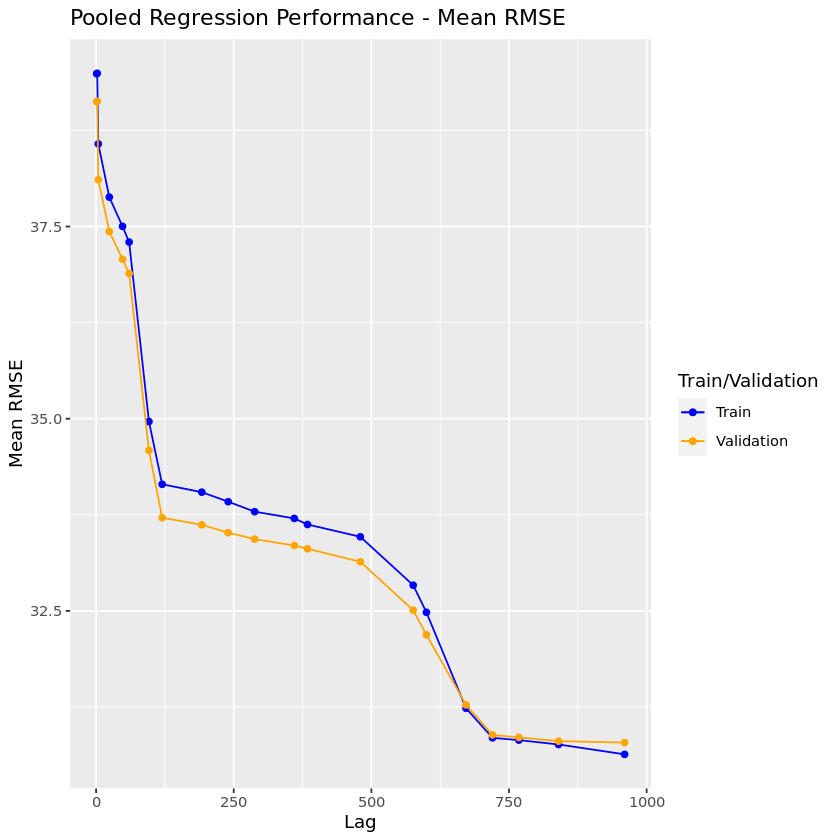

In [29]:
# Create a plot for the mean rmse for train and val sets
pooled_reg_rmse_plot <- ggplot(pooled_reg_lag_df) + 
    geom_point(aes(x=lag, y=mean_train_rmse, col='Train')) +
    geom_line(aes(x=lag, y=mean_train_rmse, col='Train')) +
    geom_point(aes(x=lag, y=mean_val_rmse, col='Validation')) +
    geom_line(aes(x=lag, y=mean_val_rmse, col='Validation')) +
    labs(x="Lag", y="Mean RMSE", title="Pooled Regression Performance - Mean RMSE",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

pooled_reg_rmse_plot

In [30]:
# Save the plot
ggsave("Results/Global/Pooled Regression/Full/mean_rmse_lag_plot.png", pooled_reg_rmse_plot, width=9, height=6)

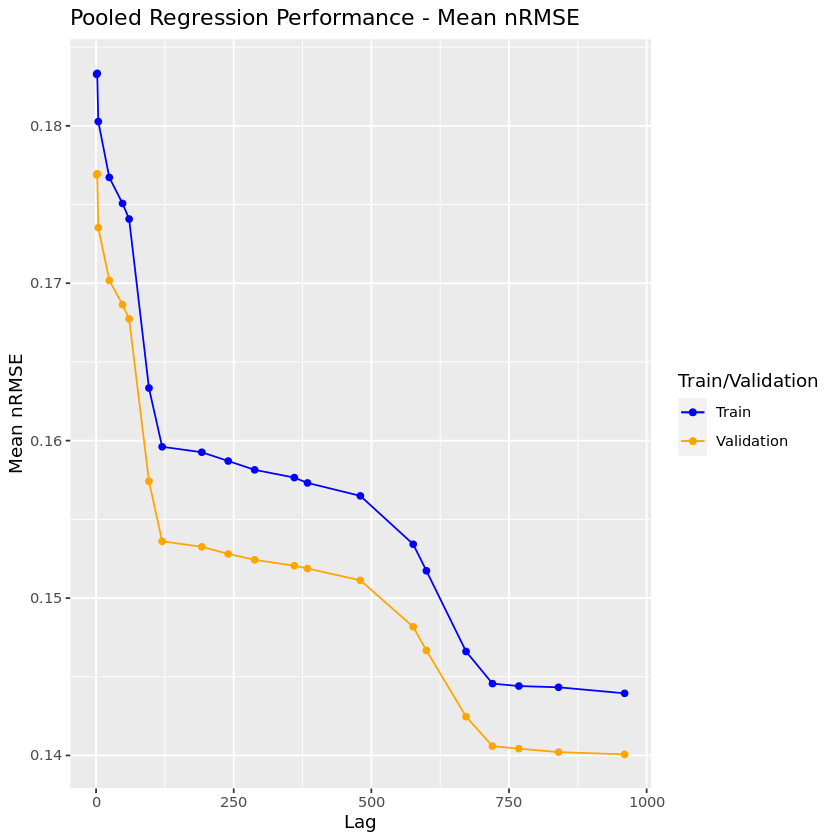

In [31]:
# Create a similar plot with the scaled RMSE
pooled_reg_rmse_scaled_plot <- ggplot(pooled_reg_lag_df) + 
    geom_point(aes(x=lag, y=mean_train_scaled_rmse, col='Train')) +
    geom_line(aes(x=lag, y=mean_train_scaled_rmse, col='Train')) +
    geom_point(aes(x=lag, y=mean_val_scaled_rmse, col='Validation')) +
    geom_line(aes(x=lag, y=mean_val_scaled_rmse, col='Validation')) +
    labs(x="Lag", y="Mean nRMSE", title="Pooled Regression Performance - Mean nRMSE",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

pooled_reg_rmse_scaled_plot

In [32]:
# Save the plot
ggsave("Results/Global/Pooled Regression/Full/mean_rmse_scaled_lag_plot.png", 
       pooled_reg_rmse_scaled_plot, width=9, height=6)

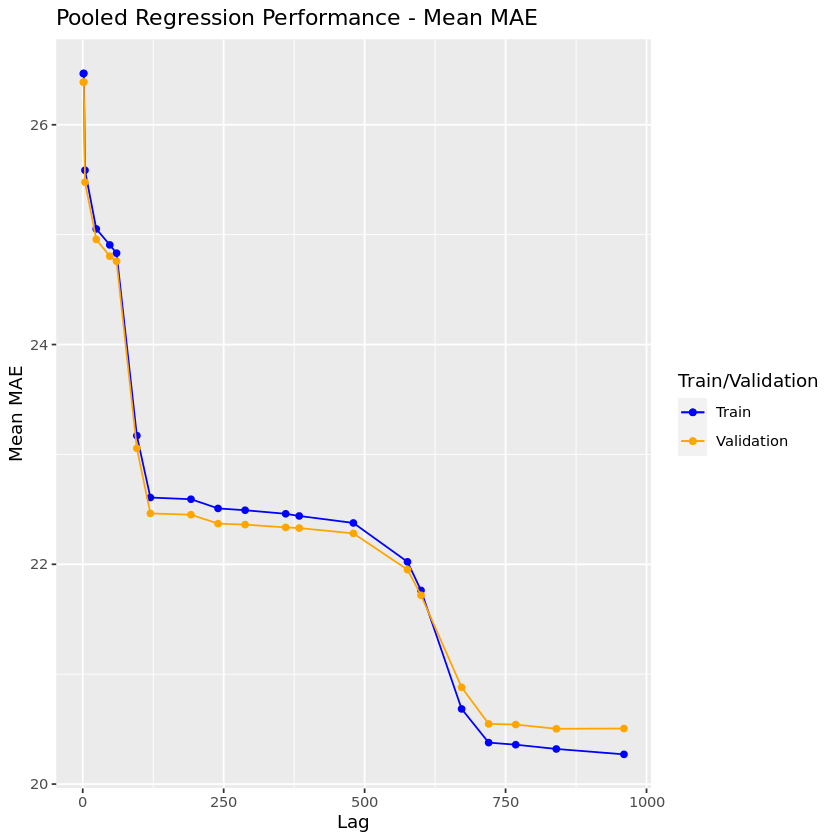

In [33]:
# Create a similar plot with the mean MAE
pooled_reg_mae_plot <- ggplot(pooled_reg_lag_df) + 
    geom_point(aes(x=lag, y=mean_train_mae, col='Train')) +
    geom_line(aes(x=lag, y=mean_train_mae, col='Train')) +
    geom_point(aes(x=lag, y=mean_val_mae, col='Validation')) +
    geom_line(aes(x=lag, y=mean_val_mae, col='Validation')) +
    labs(x="Lag", y="Mean MAE", title="Pooled Regression Performance - Mean MAE",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

pooled_reg_mae_plot

In [34]:
# Save the plot
ggsave("Results/Global/Pooled Regression/Full/mean_mae_lag_plot.png", pooled_reg_mae_plot, width=9, height=6)

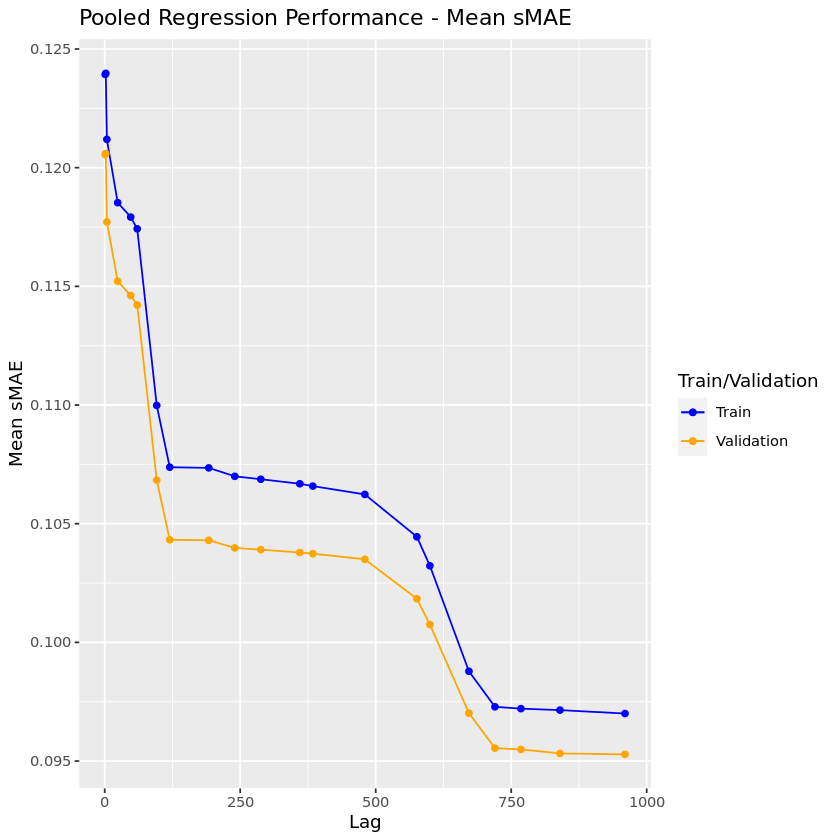

In [35]:
# Create a similar plot with scaled MAE
pooled_reg_mae_scaled_plot <- ggplot(pooled_reg_lag_df) + 
    geom_point(aes(x=lag, y=mean_train_scaled_mae, col='Train')) +
    geom_line(aes(x=lag, y=mean_train_scaled_mae, col='Train')) +
    geom_point(aes(x=lag, y=mean_val_scaled_mae, col='Validation')) +
    geom_line(aes(x=lag, y=mean_val_scaled_mae, col='Validation')) +
    labs(x="Lag", y="Mean sMAE", title="Pooled Regression Performance - Mean sMAE",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

pooled_reg_mae_scaled_plot

In [36]:
# Save the plot
ggsave("Results/Global/Pooled Regression/Full/mean_mae_scaled_lag_plot.png", 
       pooled_reg_mae_scaled_plot, width=9, height=6)

Based on the above, we will use lag=840 moving forward. But this is not the only reasonable choice

## Final Global AR Model - Full Data

In [37]:
# Create the final lag embedd matrix list using the lag of 840
embed_mat_list <- lapply(total_df_list_samples,
                     function(x) lag_embed(x, lag=840))

# Since we are training the full model now, we will combine the train and validation data to fit the model and only
# test on the test data - thus, we split these up into two separate lists of lag matrices
embed_train_val_list <- lapply(embed_mat_list,
                           function(x) rbind(data.frame(x$train), data.frame(x$val)))
 
embed_test_list <- lapply(embed_mat_list,
                          function(x) data.frame(x$test))                             

In [38]:
# Create the final model using the global_ar_least_squares function
global_ar_final <- global_ar_least_squares(train_list=embed_train_val_list, 
                                           return_train_preds=TRUE, 
                                           return_train_means=TRUE, 
                                           return_train_residuals=TRUE)

In [39]:
# Save the model to an RData file for future use
saveRDS(global_ar_final, "Results/Global/Pooled Regression/Full/global_ar_model.RData")

In [40]:
# Examine the model performance on the training data 
mean(global_ar_final$train_rmse)

[1] 30.79298

In [41]:
mean(global_ar_final$train_mae)

[1] 20.33614

In [42]:
mean(global_ar_final$train_rmse/global_ar_final$train_means)

[1] 0.143267

In [43]:
mean(global_ar_final$train_mae/global_ar_final$train_means)

[1] 0.09646005

## Global AR Model Test Predictions - Full Data

In [44]:
# Make predicitons on the test data using this model
global_ar_final_test_preds <- global_ar_least_squares_pred(global_ar_final$model, embed_test_list, TRUE, TRUE)

In [45]:
# Examine the model performance - it is quite similar to the training data, which is good
mean(global_ar_final_test_preds$test_rmse)

[1] 31.53677

In [46]:
mean(global_ar_final_test_preds$test_mae)

[1] 20.86483

In [47]:
mean(global_ar_final_test_preds$test_rmse/global_ar_final_test_preds$test_means)

[1] 0.1416465

In [48]:
mean(global_ar_final_test_preds$test_mae/global_ar_final_test_preds$test_means)

[1] 0.09576765

In [49]:
# Save the test preds into an RData file as well
saveRDS(global_ar_final_test_preds, "Results/Global/Pooled Regression/Full/global_ar_model_test_pred.RData")

In [50]:
# Create a data frame of the test data
test_data_full <- do.call("rbind", embed_test_list)

In [51]:
# Create bootstrap pred intervals on the test data, using a bootstrap sample number of n_samp=1000
# We could use a smaller n_samp for speed, but higher will give us a more accurate picture of the PIs
n_samp <- 1000
boot_test <- bootstrap_pred_int(global_ar_final_test_preds$test_preds,
                                global_ar_final$train_residuals,
                                n_samp,
                                test_data_full[,1])                    

In [52]:
head(boot_test)

,forec,ts_index,lo_80,hi_80,lo_95,hi_95,true_values,int_score_80,int_score_95
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,331.7899,1,300.6246,363.8938,268.7938,400.4313,282,249.51492,131.6375
2,333.4108,1,301.2410,365.4639,261.1426,408.3861,313,64.22289,147.2435
3,320.9358,1,294.3581,352.2149,261.7986,384.3835,336,57.85677,122.5849
4,341.3668,1,312.1785,375.5160,278.1677,419.5683,311,75.12238,141.4005
5,295.5898,1,267.2585,327.3159,232.4454,360.7432,372,506.89846,578.5701
6,311.1126,1,278.6934,342.4407,236.4438,382.9102,286,63.74730,146.4664


In [53]:
# Compute the mean of the 80% PI scores
mean((boot_test %>% group_by(ts_index) %>% summarise(int_score_80=mean(int_score_80)))$int_score_80)

[1] 125.5701

In [54]:
# Compute the mean of the 95% PI scores
mean((boot_test %>% group_by(ts_index) %>% summarise(int_score_95=mean(int_score_95)))$int_score_95)

[1] 233.2639

In [55]:
mean((boot_test %>% group_by(ts_index) %>% summarise(int_score_80=mean(int_score_80)))$int_score_80/
global_ar_final_test_preds$test_means)

[1] 0.6240918

In [56]:
mean((boot_test %>% group_by(ts_index) %>% summarise(int_score_95=mean(int_score_95)))$int_score_95/
global_ar_final_test_preds$test_means)

[1] 1.185335

In [57]:
write.csv(boot_test, "Results/Global/Pooled Regression/Full/global_ar_model_test_pred_w_int.csv", row.names=FALSE)

# Global AR Model - per Highway System

## Create the Models

In [58]:
# Create a "cluster" assignment so that we can build one model per highway system
country_clust <- data.frame(ts_index=1:76, 
                            country_clust_assign=c(rep(1, length(england_df_list)), 
                                                   rep(2, length(portland_df_list)), 
                                                   rep(3, length(utah_df_list))))

In [59]:
# Extract the proper train_val data from the original embed matrix list for each cluster
embed_train_val_list_country_clust_1 <- embed_train_val_list[c((country_clust %>% 
                                                        filter(country_clust_assign == 1))$ts_index)]
embed_train_val_list_country_clust_2 <- embed_train_val_list[c((country_clust %>% 
                                                        filter(country_clust_assign == 2))$ts_index)]
embed_train_val_list_country_clust_3 <- embed_train_val_list[c((country_clust %>% 
                                                        filter(country_clust_assign == 3))$ts_index)]


In [60]:
# Extract the proper test data from the original list for each cluster
embed_test_list_country_clust_1 <- embed_test_list[c((country_clust %>% 
                                                        filter(country_clust_assign == 1))$ts_index)]
embed_test_list_country_clust_2 <- embed_test_list[c((country_clust %>% 
                                                        filter(country_clust_assign == 2))$ts_index)]
embed_test_list_country_clust_3 <- embed_test_list[c((country_clust %>% 
                                                        filter(country_clust_assign == 3))$ts_index)]

In [61]:
# Create a model for each highway system, again using lag 840 embedding and fitting to train+val data together
global_ar_country_clust_1 <- global_ar_least_squares(embed_train_val_list_country_clust_1, 
                                                     return_train_preds=TRUE, 
                                                     return_train_means=TRUE, 
                                                     return_train_residuals=TRUE)
global_ar_country_clust_2 <- global_ar_least_squares(embed_train_val_list_country_clust_2, 
                                                     return_train_preds=TRUE, 
                                                     return_train_means=TRUE, 
                                                     return_train_residuals=TRUE)
global_ar_country_clust_3 <- global_ar_least_squares(embed_train_val_list_country_clust_3, 
                                                     return_train_preds=TRUE, 
                                                     return_train_means=TRUE, 
                                                     return_train_residuals=TRUE)

In [62]:
# Save the models to RData files for future use if needed
saveRDS(global_ar_country_clust_1, 
        "Results/Global/Pooled Regression/Highway System/global_ar_model_country_1.RData")

saveRDS(global_ar_country_clust_2, 
        "Results/Global/Pooled Regression/Highway System/global_ar_model_country_2.RData")

saveRDS(global_ar_country_clust_3, 
        "Results/Global/Pooled Regression/Highway System/global_ar_model_country_3.RData")

In [63]:
# Load the saved models as to no re-create them every time we close the notebook
global_ar_country_clust_1 <- readRDS("Results/Global/Pooled Regression/Highway System/global_ar_model_country_1.RData")

global_ar_country_clust_2 <- readRDS("Results/Global/Pooled Regression/Highway System/global_ar_model_country_2.RData")

global_ar_country_clust_3 <- readRDS("Results/Global/Pooled Regression/Highway System/global_ar_model_country_3.RData")

In [64]:
# Inspect model performance on the training data by taking the mean of the rmse on each time series, same as before
mean(c(global_ar_country_clust_1$train_rmse, 
       global_ar_country_clust_2$train_rmse,
       global_ar_country_clust_3$train_rmse))

[1] 30.57118

In [65]:
mean(c(global_ar_country_clust_1$train_mae, 
       global_ar_country_clust_2$train_mae,
       global_ar_country_clust_3$train_mae))

[1] 20.28435

In [66]:
mean(c(global_ar_country_clust_1$train_rmse, 
       global_ar_country_clust_2$train_rmse,
       global_ar_country_clust_3$train_rmse) / 
     c(global_ar_country_clust_1$train_means, 
       global_ar_country_clust_2$train_means,
       global_ar_country_clust_3$train_means)
    )

[1] 0.1424841

In [67]:
mean(c(global_ar_country_clust_1$train_mae, 
       global_ar_country_clust_2$train_mae,
       global_ar_country_clust_3$train_mae) / 
     c(global_ar_country_clust_1$train_means, 
       global_ar_country_clust_2$train_means,
       global_ar_country_clust_3$train_means)
    )

[1] 0.09646929

## Compute Test Set Preds

In [68]:
# For each model for each highway system, compute the predicitons on the test set
global_ar_country_clust_1_test_preds <- global_ar_least_squares_pred(global_ar_country_clust_1$model, 
                                                                     embed_test_list_country_clust_1, 
                                                                     TRUE, 
                                                                     TRUE)

global_ar_country_clust_2_test_preds <- global_ar_least_squares_pred(global_ar_country_clust_2$model, 
                                                                     embed_test_list_country_clust_2, 
                                                                     TRUE, 
                                                                     TRUE)

global_ar_country_clust_3_test_preds <- global_ar_least_squares_pred(global_ar_country_clust_3$model, 
                                                                     embed_test_list_country_clust_3, 
                                                                     TRUE, 
                                                                     TRUE)

In [69]:
# Save the predictions
saveRDS(global_ar_country_clust_1_test_preds, 
        "Results/Global/Pooled Regression/Highway System/global_ar_model_country_1_test_pred.RData")

saveRDS(global_ar_country_clust_2_test_preds, 
        "Results/Global/Pooled Regression/Highway System/global_ar_model_country_2_test_pred.RData")

saveRDS(global_ar_country_clust_3_test_preds, 
        "Results/Global/Pooled Regression/Highway System/global_ar_model_country_3_test_pred.RData")

In [70]:
# Inspect the overall average performance
mean(c(global_ar_country_clust_1_test_preds$test_rmse,  
       global_ar_country_clust_2_test_preds$test_rmse, 
       global_ar_country_clust_3_test_preds$test_rmse))

[1] 31.45831

In [71]:
mean(c(global_ar_country_clust_1_test_preds$test_mae,  
       global_ar_country_clust_2_test_preds$test_mae, 
       global_ar_country_clust_3_test_preds$test_mae))

[1] 20.88962

In [72]:
mean(c(global_ar_country_clust_1_test_preds$test_rmse,  
       global_ar_country_clust_2_test_preds$test_rmse, 
       global_ar_country_clust_3_test_preds$test_rmse) / 
     c(global_ar_country_clust_1_test_preds$test_means,  
       global_ar_country_clust_2_test_preds$test_means, 
       global_ar_country_clust_3_test_preds$test_means)
    )

[1] 0.1413445

In [73]:
mean(c(global_ar_country_clust_1_test_preds$test_mae,  
       global_ar_country_clust_2_test_preds$test_mae, 
       global_ar_country_clust_3_test_preds$test_mae) / 
     c(global_ar_country_clust_1_test_preds$test_means,  
       global_ar_country_clust_2_test_preds$test_means, 
       global_ar_country_clust_3_test_preds$test_means)
    )

[1] 0.09605483

### Bootstrap Prediction Intervals

In [74]:
# Create a single dataframe of test data for each cluster
country_clust_1_test_data_full <- do.call("rbind", embed_test_list_country_clust_1)
country_clust_2_test_data_full <- do.call("rbind", embed_test_list_country_clust_2)
country_clust_3_test_data_full <- do.call("rbind", embed_test_list_country_clust_3)

In [75]:
# Compute the bootstrap pred intervals for each cluster
global_ar_country_clust_1_test_preds_boot <- bootstrap_pred_int(global_ar_country_clust_1_test_preds$test_preds,
                                                                global_ar_country_clust_1$train_residuals,
                                                                n_samp,
                                                                country_clust_1_test_data_full[,1])      

global_ar_country_clust_2_test_preds_boot <- bootstrap_pred_int(global_ar_country_clust_2_test_preds$test_preds,
                                                                global_ar_country_clust_2$train_residuals,
                                                                n_samp,
                                                                country_clust_2_test_data_full[,1])      

global_ar_country_clust_3_test_preds_boot <- bootstrap_pred_int(global_ar_country_clust_3_test_preds$test_preds,
                                                                global_ar_country_clust_3$train_residuals,
                                                                n_samp,
                                                                country_clust_3_test_data_full[,1])      

In [76]:
# Combine the results from each cluster into one final dataframe
global_ar_country_clust_test_preds_boot <- rbind(global_ar_country_clust_1_test_preds_boot,
                                                 global_ar_country_clust_2_test_preds_boot,
                                                 global_ar_country_clust_3_test_preds_boot
                                                )

In [77]:
# Examine the average interval scores for the 80% and 95% PIs
mean(global_ar_country_clust_test_preds_boot$int_score_80)

[1] 123.2557

In [78]:
mean(global_ar_country_clust_test_preds_boot$int_score_95)

[1] 224.6933

In [79]:
mean(c((global_ar_country_clust_1_test_preds_boot %>% 
    group_by(ts_index) %>% 
    summarise(int_score_80=mean(int_score_80)))$int_score_80,

(global_ar_country_clust_2_test_preds_boot %>% 
    group_by(ts_index) %>% 
    summarise(int_score_80=mean(int_score_80)))$int_score_80,

(global_ar_country_clust_3_test_preds_boot %>% 
    group_by(ts_index) %>% 
    summarise(int_score_80=mean(int_score_80)))$int_score_80) /

 c(global_ar_country_clust_1_test_preds$test_means,  
       global_ar_country_clust_2_test_preds$test_means, 
       global_ar_country_clust_3_test_preds$test_means)
)

[1] 0.5952259

In [80]:
mean(c((global_ar_country_clust_1_test_preds_boot %>% 
    group_by(ts_index) %>% 
    summarise(int_score_95=mean(int_score_95)))$int_score_95,

(global_ar_country_clust_2_test_preds_boot %>% 
    group_by(ts_index) %>% 
    summarise(int_score_95=mean(int_score_95)))$int_score_95,

(global_ar_country_clust_3_test_preds_boot %>% 
    group_by(ts_index) %>% 
    summarise(int_score_95=mean(int_score_95)))$int_score_95) /

 c(global_ar_country_clust_1_test_preds$test_means,  
       global_ar_country_clust_2_test_preds$test_means, 
       global_ar_country_clust_3_test_preds$test_means)
)

[1] 1.096279

In [81]:
# Save the results to a csv file
write.csv(global_ar_country_clust_test_preds_boot, 
          "Results/Global/Pooled Regression/Highway System/global_ar_model_per_country_test_pred_w_int.csv", 
          row.names=FALSE)

# Global AR Model - Random Clustering

In [82]:
# Read in the random clustering assignments generating in notebook 7 to use for modeling
random_clust <- read_csv('Results/Clustering/Random/random_clustering_assign.csv')

Rows: 76 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, random_clust_assign

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [83]:
head(random_clust)

ts_index,random_clust_assign
<dbl>,<dbl>
1,4
2,4
3,4
4,4
5,3
6,4


In [84]:
max(random_clust$random_clust_assign)

[1] 4

In [85]:
# Create the appropriate lists of train_val matrices and test matrices based on the cluster assignments
embed_train_val_list_rand_clust_1 <- embed_train_val_list[c((random_clust %>% 
                                                         filter(random_clust_assign == 1))$ts_index)]
embed_train_val_list_rand_clust_2 <- embed_train_val_list[c((random_clust %>% 
                                                         filter(random_clust_assign == 2))$ts_index)]
embed_train_val_list_rand_clust_3 <- embed_train_val_list[c((random_clust %>% 
                                                         filter(random_clust_assign == 3))$ts_index)]
embed_train_val_list_rand_clust_4 <- embed_train_val_list[c((random_clust %>% 
                                                         filter(random_clust_assign == 4))$ts_index)]
embed_test_list_rand_clust_1 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 1))$ts_index)]
embed_test_list_rand_clust_2 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 2))$ts_index)]
embed_test_list_rand_clust_3 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 3))$ts_index)]
embed_test_list_rand_clust_4 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 4))$ts_index)]

In [86]:
# Create a model per random cluster
global_ar_rand_clust_1 <- global_ar_least_squares(embed_train_val_list_rand_clust_1,
                                                  return_train_preds=TRUE, 
                                                  return_train_means=TRUE, 
                                                  return_train_residuals=TRUE)

global_ar_rand_clust_2 <- global_ar_least_squares(embed_train_val_list_rand_clust_2,
                                                  return_train_preds=TRUE, 
                                                  return_train_means=TRUE, 
                                                  return_train_residuals=TRUE)

global_ar_rand_clust_3 <- global_ar_least_squares(embed_train_val_list_rand_clust_3,
                                                  return_train_preds=TRUE, 
                                                  return_train_means=TRUE, 
                                                  return_train_residuals=TRUE)

global_ar_rand_clust_4 <- global_ar_least_squares(embed_train_val_list_rand_clust_4,
                                                  return_train_preds=TRUE, 
                                                  return_train_means=TRUE, 
                                                  return_train_residuals=TRUE)

In [87]:
# Save the models for future use
saveRDS(global_ar_rand_clust_1, 
        "Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_1.RData")

saveRDS(global_ar_rand_clust_2, 
        "Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_2.RData")

saveRDS(global_ar_rand_clust_3, 
        "Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_3.RData")

saveRDS(global_ar_rand_clust_4, 
        "Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_4.RData")

In [88]:
# Load saved models from file
global_ar_rand_clust_1 <- readRDS("Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_1.RData")

global_ar_rand_clust_2 <- readRDS("Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_2.RData")

global_ar_rand_clust_3 <- readRDS("Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_3.RData")

global_ar_rand_clust_4 <- readRDS("Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_4.RData")

In [89]:
# Examine the overall average performance of these models on the training data
mean(c(global_ar_rand_clust_1$train_rmse,
       global_ar_rand_clust_2$train_rmse,
       global_ar_rand_clust_3$train_rmse,
       global_ar_rand_clust_4$train_rmse))

[1] 30.63058

In [90]:
mean(c(global_ar_rand_clust_1$train_mae,
       global_ar_rand_clust_2$train_mae,
       global_ar_rand_clust_3$train_mae,
       global_ar_rand_clust_4$train_mae))

[1] 20.37262

In [91]:
mean(c(global_ar_rand_clust_1$train_rmse,
       global_ar_rand_clust_2$train_rmse,
       global_ar_rand_clust_3$train_rmse,
       global_ar_rand_clust_4$train_rmse) / 
     c(global_ar_rand_clust_1$train_means,
       global_ar_rand_clust_2$train_means,
       global_ar_rand_clust_3$train_means,
       global_ar_rand_clust_4$train_means)
    )

[1] 0.143756

In [92]:
mean(c(global_ar_rand_clust_1$train_mae,
       global_ar_rand_clust_2$train_mae,
       global_ar_rand_clust_3$train_mae,
       global_ar_rand_clust_4$train_mae) / 
     c(global_ar_rand_clust_1$train_means,
       global_ar_rand_clust_2$train_means,
       global_ar_rand_clust_3$train_means,
       global_ar_rand_clust_4$train_means)
    )

[1] 0.09741228

## Test Preds

In [93]:
# Compute test preds for each random cluster
global_ar_rand_clust_1_preds <- global_ar_least_squares_pred(global_ar_rand_clust_1$model, 
                                                             embed_test_list_rand_clust_1,
                                                             TRUE,
                                                             TRUE
                                                            )

global_ar_rand_clust_2_preds <- global_ar_least_squares_pred(global_ar_rand_clust_2$model, 
                                                             embed_test_list_rand_clust_2,
                                                             TRUE,
                                                             TRUE
                                                             )

global_ar_rand_clust_3_preds <- global_ar_least_squares_pred(global_ar_rand_clust_3$model, 
                                                             embed_test_list_rand_clust_3,
                                                             TRUE,
                                                             TRUE)

global_ar_rand_clust_4_preds <- global_ar_least_squares_pred(global_ar_rand_clust_4$model, 
                                                             embed_test_list_rand_clust_4,
                                                             TRUE,
                                                             TRUE)

In [94]:
# Examine the average performance on the test data
mean(c(global_ar_rand_clust_1_preds$test_rmse,
       global_ar_rand_clust_2_preds$test_rmse,
       global_ar_rand_clust_3_preds$test_rmse,
       global_ar_rand_clust_4_preds$test_rmse
      ))

[1] 31.69311

In [95]:
mean(c(global_ar_rand_clust_1_preds$test_mae,
       global_ar_rand_clust_2_preds$test_mae,
       global_ar_rand_clust_3_preds$test_mae,
       global_ar_rand_clust_4_preds$test_mae
      ))

[1] 21.10156

In [96]:
mean(c(global_ar_rand_clust_1_preds$test_rmse,
       global_ar_rand_clust_2_preds$test_rmse,
       global_ar_rand_clust_3_preds$test_rmse,
       global_ar_rand_clust_4_preds$test_rmse
      ) /
     c(global_ar_rand_clust_1_preds$test_means,
       global_ar_rand_clust_2_preds$test_means,
       global_ar_rand_clust_3_preds$test_means,
       global_ar_rand_clust_4_preds$test_means
      )
    )

[1] 0.1429351

In [97]:
mean(c(global_ar_rand_clust_1_preds$test_mae,
       global_ar_rand_clust_2_preds$test_mae,
       global_ar_rand_clust_3_preds$test_mae,
       global_ar_rand_clust_4_preds$test_mae
      ) /
     c(global_ar_rand_clust_1_preds$test_means,
       global_ar_rand_clust_2_preds$test_means,
       global_ar_rand_clust_3_preds$test_means,
       global_ar_rand_clust_4_preds$test_means
      )
    )

[1] 0.09722029

In [98]:
# Save the results
saveRDS(global_ar_rand_clust_1_preds, 
        "Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_1_test_pred.RData")

saveRDS(global_ar_rand_clust_2_preds, 
        "Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_2_test_pred.RData")

saveRDS(global_ar_rand_clust_3_preds, 
        "Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_3_test_pred.RData")

saveRDS(global_ar_rand_clust_4_preds, 
        "Results/Global/Pooled Regression/Random Cluster/global_ar_model_cluster_4_test_pred.RData")

### Bootstrap Pred Intervals

In [99]:
# Per cluter, create a df of the test data
rand_clust_1_test_data_full <- do.call("rbind", embed_test_list_rand_clust_1)
rand_clust_2_test_data_full <- do.call("rbind", embed_test_list_rand_clust_2)
rand_clust_3_test_data_full <- do.call("rbind", embed_test_list_rand_clust_3)
rand_clust_4_test_data_full <- do.call("rbind", embed_test_list_rand_clust_4)

In [100]:
# Compute bootstrap pred ints for each prediction
global_ar_rand_clust_1_test_preds_boot <- bootstrap_pred_int(global_ar_rand_clust_1_preds$test_preds,
                                                                global_ar_rand_clust_1$train_residuals,
                                                                n_samp,
                                                                rand_clust_1_test_data_full[,1])      

global_ar_rand_clust_2_test_preds_boot <- bootstrap_pred_int(global_ar_rand_clust_2_preds$test_preds,
                                                                global_ar_rand_clust_2$train_residuals,
                                                                n_samp,
                                                                rand_clust_2_test_data_full[,1])      

global_ar_rand_clust_3_test_preds_boot <- bootstrap_pred_int(global_ar_rand_clust_3_preds$test_preds,
                                                                global_ar_rand_clust_3$train_residuals,
                                                                n_samp,
                                                                rand_clust_3_test_data_full[,1])      

global_ar_rand_clust_4_test_preds_boot <- bootstrap_pred_int(global_ar_rand_clust_4_preds$test_preds,
                                                                global_ar_rand_clust_4$train_residuals,
                                                                n_samp,
                                                                rand_clust_4_test_data_full[,1]) 

In [101]:
# Combine all preds into one df
global_ar_rand_clust_test_preds_boot <- rbind(global_ar_rand_clust_1_test_preds_boot,
                                              global_ar_rand_clust_2_test_preds_boot,
                                              global_ar_rand_clust_3_test_preds_boot,
                                              global_ar_rand_clust_4_test_preds_boot
                                              )

In [102]:
# Compute average interval scores
mean(global_ar_rand_clust_test_preds_boot$int_score_80)

[1] 124.7087

In [103]:
mean(global_ar_rand_clust_test_preds_boot$int_score_95)

[1] 227.9093

In [104]:
mean(c((global_ar_rand_clust_1_test_preds_boot %>% 
          group_by(ts_index) %>% 
          summarise(int_score_80=mean(int_score_80)))$int_score_80,
(global_ar_rand_clust_2_test_preds_boot %>% 
          group_by(ts_index) %>% 
          summarise(int_score_80=mean(int_score_80)))$int_score_80,
(global_ar_rand_clust_3_test_preds_boot %>% 
          group_by(ts_index) %>% 
          summarise(int_score_80=mean(int_score_80)))$int_score_80,
(global_ar_rand_clust_4_test_preds_boot %>% 
          group_by(ts_index) %>% 
          summarise(int_score_80=mean(int_score_80)))$int_score_80)/
     c(global_ar_rand_clust_1_preds$test_means,
       global_ar_rand_clust_2_preds$test_means,
       global_ar_rand_clust_3_preds$test_means,
       global_ar_rand_clust_4_preds$test_means
      ))

[1] 0.6097818

In [105]:
mean(c((global_ar_rand_clust_1_test_preds_boot %>% 
          group_by(ts_index) %>% 
          summarise(int_score_95=mean(int_score_95)))$int_score_95,
(global_ar_rand_clust_2_test_preds_boot %>% 
          group_by(ts_index) %>% 
          summarise(int_score_95=mean(int_score_95)))$int_score_95,
(global_ar_rand_clust_3_test_preds_boot %>% 
          group_by(ts_index) %>% 
          summarise(int_score_95=mean(int_score_95)))$int_score_95,
(global_ar_rand_clust_4_test_preds_boot %>% 
          group_by(ts_index) %>% 
          summarise(int_score_95=mean(int_score_95)))$int_score_95)/
     c(global_ar_rand_clust_1_preds$test_means,
       global_ar_rand_clust_2_preds$test_means,
       global_ar_rand_clust_3_preds$test_means,
       global_ar_rand_clust_4_preds$test_means
      ))

[1] 1.120009

In [106]:
# Save the results
write.csv(global_ar_rand_clust_test_preds_boot, 
          "Results/Global/Pooled Regression/Random Cluster/global_ar_model_rand_clust_test_pred_w_int.csv", 
          row.names=FALSE)

# Global AR Model - KMeans Catch22 Clustering

In [109]:
# Read in cluster assignments from the Catch22 based k-means clustering
kmeans_catch22_clust <- read_csv('Results/Clustering/KMeans/kmeans_catch22_clustering_assign.csv')

Rows: 76 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, kmeans_catch22_clust_assign

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [110]:
# THe number of clusters is 5, so we will create 5 train and test sets and 5 models, one per cluster
max(kmeans_catch22_clust$kmeans_catch22_clust_assign)

[1] 5

In [111]:
# Create the appropriate groupings for training data
embed_train_val_list_kmeans_catch22_clust_1 <- embed_train_val_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_train_val_list_kmeans_catch22_clust_2 <- embed_train_val_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]
embed_train_val_list_kmeans_catch22_clust_3 <- embed_train_val_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 3))$ts_index)]
embed_train_val_list_kmeans_catch22_clust_4 <- embed_train_val_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 4))$ts_index)]
embed_train_val_list_kmeans_catch22_clust_5 <- embed_train_val_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 5))$ts_index)]

In [112]:
# Subset the test data into the clusters
embed_test_list_kmeans_catch22_clust_1 <- embed_test_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_test_list_kmeans_catch22_clust_2 <- embed_test_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]
embed_test_list_kmeans_catch22_clust_3 <- embed_test_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 3))$ts_index)]
embed_test_list_kmeans_catch22_clust_4 <- embed_test_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 4))$ts_index)]
embed_test_list_kmeans_catch22_clust_5 <- embed_test_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 5))$ts_index)]

In [113]:
# Create a model per cluster
global_ar_kmeans_catch22_clust_1 <- global_ar_least_squares(embed_train_val_list_kmeans_catch22_clust_1,
                                                               return_train_preds=TRUE, 
                                                               return_train_means=TRUE, 
                                                               return_train_residuals=TRUE)

global_ar_kmeans_catch22_clust_2 <- global_ar_least_squares(embed_train_val_list_kmeans_catch22_clust_2,
                                                               return_train_preds=TRUE, 
                                                               return_train_means=TRUE, 
                                                               return_train_residuals=TRUE)

global_ar_kmeans_catch22_clust_3 <- global_ar_least_squares(embed_train_val_list_kmeans_catch22_clust_3,
                                                               return_train_preds=TRUE, 
                                                               return_train_means=TRUE, 
                                                               return_train_residuals=TRUE)
                                                  
global_ar_kmeans_catch22_clust_4 <- global_ar_least_squares(embed_train_val_list_kmeans_catch22_clust_4,
                                                               return_train_preds=TRUE, 
                                                               return_train_means=TRUE, 
                                                               return_train_residuals=TRUE)

global_ar_kmeans_catch22_clust_5 <- global_ar_least_squares(embed_train_val_list_kmeans_catch22_clust_5,
                                                               return_train_preds=TRUE, 
                                                               return_train_means=TRUE, 
                                                               return_train_residuals=TRUE)

In [114]:
# Save the models
saveRDS(global_ar_kmeans_catch22_clust_1, 
        "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_model_kmeans_catch22_clust_1.RData")

saveRDS(global_ar_kmeans_catch22_clust_2, 
        "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_model_kmeans_catch22_clust_2.RData")

saveRDS(global_ar_kmeans_catch22_clust_3, 
        "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_model_kmeans_catch22_clust_3.RData")

saveRDS(global_ar_kmeans_catch22_clust_4, 
        "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_model_kmeans_catch22_clust_4.RData")

saveRDS(global_ar_kmeans_catch22_clust_5, 
        "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_model_kmeans_catch22_clust_5.RData")

In [115]:
# Load the saved models
global_ar_kmeans_catch22_clust_1 <- readRDS("Results/Global/Pooled Regression/Catch22 KMeans/global_ar_model_kmeans_catch22_clust_1.RData")

global_ar_kmeans_catch22_clust_2 <- readRDS("Results/Global/Pooled Regression/Catch22 KMeans/global_ar_model_kmeans_catch22_clust_2.RData")

global_ar_kmeans_catch22_clust_3 <- readRDS("Results/Global/Pooled Regression/Catch22 KMeans/global_ar_model_kmeans_catch22_clust_3.RData")

global_ar_kmeans_catch22_clust_4 <- readRDS("Results/Global/Pooled Regression/Catch22 KMeans/global_ar_model_kmeans_catch22_clust_4.RData")

global_ar_kmeans_catch22_clust_5 <- readRDS("Results/Global/Pooled Regression/Catch22 KMeans/global_ar_model_kmeans_catch22_clust_5.RData")

## Test Preds

In [116]:
# Run one-step ahead forecasts on test data
global_ar_kmeans_catch22_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_clust_1$model,
                                                                           embed_test_list_kmeans_catch22_clust_1,
                                                                           TRUE,
                                                                           TRUE)

global_ar_kmeans_catch22_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_clust_2$model,
                                                                           embed_test_list_kmeans_catch22_clust_2,
                                                                           TRUE,
                                                                           TRUE)

global_ar_kmeans_catch22_clust_3_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_clust_3$model,
                                                                           embed_test_list_kmeans_catch22_clust_3,
                                                                           TRUE,
                                                                           TRUE)

global_ar_kmeans_catch22_clust_4_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_clust_4$model,
                                                                           embed_test_list_kmeans_catch22_clust_4,
                                                                           TRUE,
                                                                           TRUE)

global_ar_kmeans_catch22_clust_5_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_clust_5$model,
                                                                           embed_test_list_kmeans_catch22_clust_5,
                                                                           TRUE,
                                                                           TRUE)

In [117]:
# Examine performance
mean(c(global_ar_kmeans_catch22_clust_1_test_pred$test_rmse,
       global_ar_kmeans_catch22_clust_2_test_pred$test_rmse,
       global_ar_kmeans_catch22_clust_3_test_pred$test_rmse,
       global_ar_kmeans_catch22_clust_4_test_pred$test_rmse,
       global_ar_kmeans_catch22_clust_5_test_pred$test_rmse
      ))

[1] 31.4315

In [118]:
mean(c(global_ar_kmeans_catch22_clust_1_test_pred$test_mae,
       global_ar_kmeans_catch22_clust_2_test_pred$test_mae,
       global_ar_kmeans_catch22_clust_3_test_pred$test_mae,
       global_ar_kmeans_catch22_clust_4_test_pred$test_mae,
       global_ar_kmeans_catch22_clust_5_test_pred$test_mae
      ))

[1] 20.93542

In [119]:
mean(c(global_ar_kmeans_catch22_clust_1_test_pred$test_rmse,
       global_ar_kmeans_catch22_clust_2_test_pred$test_rmse,
       global_ar_kmeans_catch22_clust_3_test_pred$test_rmse,
       global_ar_kmeans_catch22_clust_4_test_pred$test_rmse,
       global_ar_kmeans_catch22_clust_5_test_pred$test_rmse)
     /
     c(global_ar_kmeans_catch22_clust_1_test_pred$test_means,
       global_ar_kmeans_catch22_clust_2_test_pred$test_means,
       global_ar_kmeans_catch22_clust_3_test_pred$test_means,
       global_ar_kmeans_catch22_clust_4_test_pred$test_means,
       global_ar_kmeans_catch22_clust_5_test_pred$test_means)
    )

[1] 0.1408216

In [120]:
mean(c(global_ar_kmeans_catch22_clust_1_test_pred$test_mae,
       global_ar_kmeans_catch22_clust_2_test_pred$test_mae,
       global_ar_kmeans_catch22_clust_3_test_pred$test_mae,
       global_ar_kmeans_catch22_clust_4_test_pred$test_mae,
       global_ar_kmeans_catch22_clust_5_test_pred$test_mae)
     /
     c(global_ar_kmeans_catch22_clust_1_test_pred$test_means,
       global_ar_kmeans_catch22_clust_2_test_pred$test_means,
       global_ar_kmeans_catch22_clust_3_test_pred$test_means,
       global_ar_kmeans_catch22_clust_4_test_pred$test_means,
       global_ar_kmeans_catch22_clust_5_test_pred$test_means)
    )

[1] 0.09563724

In [121]:
# Save the test preds to files
saveRDS(global_ar_kmeans_catch22_clust_1_test_pred, 
        "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_kmeans_catch22_clust_1_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_clust_2_test_pred, 
        "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_kmeans_catch22_clust_2_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_clust_3_test_pred, 
        "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_kmeans_catch22_clust_3_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_clust_4_test_pred, 
        "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_kmeans_catch22_clust_4_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_clust_5_test_pred, 
        "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_kmeans_catch22_clust_5_test_pred.RData")

### Boostrap Pred Intervals

In [122]:
# Create bootstrap pred intervals - first, we create one df of test data per cluster
catch22_clust_1_test_data_full <- do.call("rbind", embed_test_list_kmeans_catch22_clust_1)
catch22_clust_2_test_data_full <- do.call("rbind", embed_test_list_kmeans_catch22_clust_2)
catch22_clust_3_test_data_full <- do.call("rbind", embed_test_list_kmeans_catch22_clust_3)
catch22_clust_4_test_data_full <- do.call("rbind", embed_test_list_kmeans_catch22_clust_4)
catch22_clust_5_test_data_full <- do.call("rbind", embed_test_list_kmeans_catch22_clust_5)

In [123]:
# Next, compute the bootstrap PIs for each prediction
global_ar_catch22_clust_1_test_preds_boot <- bootstrap_pred_int(global_ar_kmeans_catch22_clust_1_test_pred$test_preds,
                                                                global_ar_kmeans_catch22_clust_1$train_residuals,
                                                                n_samp,
                                                                catch22_clust_1_test_data_full[,1])      

global_ar_catch22_clust_2_test_preds_boot <- bootstrap_pred_int(global_ar_kmeans_catch22_clust_2_test_pred$test_preds,
                                                                global_ar_kmeans_catch22_clust_2$train_residuals,
                                                                n_samp,
                                                                catch22_clust_2_test_data_full[,1])      

global_ar_catch22_clust_3_test_preds_boot <- bootstrap_pred_int(global_ar_kmeans_catch22_clust_3_test_pred$test_preds,
                                                                global_ar_kmeans_catch22_clust_3$train_residuals,
                                                                n_samp,
                                                                catch22_clust_3_test_data_full[,1])    

global_ar_catch22_clust_4_test_preds_boot <- bootstrap_pred_int(global_ar_kmeans_catch22_clust_4_test_pred$test_preds,
                                                                global_ar_kmeans_catch22_clust_4$train_residuals,
                                                                n_samp,
                                                                catch22_clust_4_test_data_full[,1])   

global_ar_catch22_clust_5_test_preds_boot <- bootstrap_pred_int(global_ar_kmeans_catch22_clust_5_test_pred$test_preds,
                                                                global_ar_kmeans_catch22_clust_5$train_residuals,
                                                                n_samp,
                                                                catch22_clust_5_test_data_full[,1])    

In [124]:
# Put all preds with PIs into one df
global_ar_catch22_clust_test_preds_boot <- rbind(global_ar_catch22_clust_1_test_preds_boot,
                                                 global_ar_catch22_clust_2_test_preds_boot,
                                                 global_ar_catch22_clust_3_test_preds_boot,
                                                 global_ar_catch22_clust_4_test_preds_boot,
                                                 global_ar_catch22_clust_5_test_preds_boot)

In [125]:
# Examine the mean interval scores
mean(global_ar_catch22_clust_test_preds_boot$int_score_80)

[1] 121.0053

In [126]:
mean(global_ar_catch22_clust_test_preds_boot$int_score_95)

[1] 216.9203

In [128]:
mean(c((global_ar_catch22_clust_1_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_80=mean(int_score_80)))$int_score_80,
(global_ar_catch22_clust_2_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_80=mean(int_score_80)))$int_score_80,
(global_ar_catch22_clust_3_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_80=mean(int_score_80)))$int_score_80, 
       (global_ar_catch22_clust_4_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_80=mean(int_score_80)))$int_score_80,
       (global_ar_catch22_clust_5_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_80=mean(int_score_80)))$int_score_80) / 
c(global_ar_kmeans_catch22_clust_1_test_pred$test_means,
       global_ar_kmeans_catch22_clust_2_test_pred$test_means,
       global_ar_kmeans_catch22_clust_3_test_pred$test_means,
       global_ar_kmeans_catch22_clust_4_test_pred$test_means,
       global_ar_kmeans_catch22_clust_5_test_pred$test_means))

[1] 0.548547

In [129]:
mean(c((global_ar_catch22_clust_1_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_95=mean(int_score_95)))$int_score_95,
(global_ar_catch22_clust_2_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_95=mean(int_score_95)))$int_score_95,
(global_ar_catch22_clust_3_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_95=mean(int_score_95)))$int_score_95,
      (global_ar_catch22_clust_4_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_95=mean(int_score_95)))$int_score_95,
       (global_ar_catch22_clust_5_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_95=mean(int_score_95)))$int_score_95
      ) / 
c(global_ar_kmeans_catch22_clust_1_test_pred$test_means,
       global_ar_kmeans_catch22_clust_2_test_pred$test_means,
       global_ar_kmeans_catch22_clust_3_test_pred$test_means,
       global_ar_kmeans_catch22_clust_4_test_pred$test_means,
       global_ar_kmeans_catch22_clust_5_test_pred$test_means))

[1] 0.9588025

In [130]:
# Save to file
write.csv(global_ar_catch22_clust_test_preds_boot, 
          "Results/Global/Pooled Regression/Catch22 KMeans/global_ar_kmeans_catch22_clust_test_pred_w_int.csv", 
          row.names=FALSE)

# Global AR Model - KMeans TSFeat Clustering

In [131]:
# Read in cluster assignments from the tsfeatures based k-means clustering
kmeans_tsfeat_clust <- read_csv('Results/Clustering/KMeans/kmeans_tsfeat_clustering_assign.csv')

Rows: 76 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, kmeans_tsfeat_clust_assign

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [132]:
# The number of clusters is 3, so we will create 3 train and test sets and 3 models, one per cluster
max(kmeans_tsfeat_clust$kmeans_tsfeat_clust_assign)

[1] 2

In [133]:
# Create the appropriate groupings for training data
embed_train_val_list_kmeans_tsfeat_clust_1 <- embed_train_val_list[c((kmeans_tsfeat_clust %>% 
                                                               filter(kmeans_tsfeat_clust_assign == 1))$ts_index)]
embed_train_val_list_kmeans_tsfeat_clust_2 <- embed_train_val_list[c((kmeans_tsfeat_clust %>% 
                                                               filter(kmeans_tsfeat_clust_assign == 2))$ts_index)]

In [134]:
# Subset the test data into the clusters
embed_test_list_kmeans_tsfeat_clust_1 <- embed_test_list[c((kmeans_tsfeat_clust %>% 
                                                               filter(kmeans_tsfeat_clust_assign == 1))$ts_index)]
embed_test_list_kmeans_tsfeat_clust_2 <- embed_test_list[c((kmeans_tsfeat_clust %>% 
                                                               filter(kmeans_tsfeat_clust_assign == 2))$ts_index)]

In [135]:
# Create a model per cluster
global_ar_kmeans_tsfeat_clust_1 <- global_ar_least_squares(embed_train_val_list_kmeans_tsfeat_clust_1,
                                                               return_train_preds=TRUE, 
                                                               return_train_means=TRUE, 
                                                               return_train_residuals=TRUE)

global_ar_kmeans_tsfeat_clust_2 <- global_ar_least_squares(embed_train_val_list_kmeans_tsfeat_clust_2,
                                                               return_train_preds=TRUE, 
                                                               return_train_means=TRUE, 
                                                               return_train_residuals=TRUE)

In [136]:
# Save the models
saveRDS(global_ar_kmeans_tsfeat_clust_1, 
        "Results/Global/Pooled Regression/TSFeat KMeans/global_ar_model_kmeans_tsfeat_clust_1.RData")

saveRDS(global_ar_kmeans_tsfeat_clust_2, 
        "Results/Global/Pooled Regression/TSFeat KMeans/global_ar_model_kmeans_tsfeat_clust_2.RData")

In [137]:
# Load the saved the models
global_ar_kmeans_tsfeat_clust_1 <- readRDS("Results/Global/Pooled Regression/TSFeat KMeans/global_ar_model_kmeans_tsfeat_clust_1.RData")

global_ar_kmeans_tsfeat_clust_2 <- readRDS("Results/Global/Pooled Regression/TSFeat KMeans/global_ar_model_kmeans_tsfeat_clust_2.RData")

## Test Preds

In [138]:
# Run one-step ahead forecasts on test data
global_ar_kmeans_tsfeat_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_tsfeat_clust_1$model,
                                                                           embed_test_list_kmeans_tsfeat_clust_1,
                                                                           TRUE,
                                                                           TRUE)

global_ar_kmeans_tsfeat_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_tsfeat_clust_2$model,
                                                                           embed_test_list_kmeans_tsfeat_clust_2,
                                                                           TRUE,
                                                                           TRUE)

In [139]:
# Print and examine average perofrmance metrics
mean(c(global_ar_kmeans_tsfeat_clust_1_test_pred$test_rmse,
       global_ar_kmeans_tsfeat_clust_2_test_pred$test_rmse))

[1] 31.54072

In [140]:
mean(c(global_ar_kmeans_tsfeat_clust_1_test_pred$test_mae,
       global_ar_kmeans_tsfeat_clust_2_test_pred$test_mae))

[1] 20.9431

In [141]:
mean(c(global_ar_kmeans_tsfeat_clust_1_test_pred$test_rmse,
       global_ar_kmeans_tsfeat_clust_2_test_pred$test_rmse)
     /
     c(global_ar_kmeans_tsfeat_clust_1_test_pred$test_means,
       global_ar_kmeans_tsfeat_clust_2_test_pred$test_means)
    )

[1] 0.1417946

In [143]:
mean(c(global_ar_kmeans_tsfeat_clust_1_test_pred$test_mae,
       global_ar_kmeans_tsfeat_clust_2_test_pred$test_mae)
     /
     c(global_ar_kmeans_tsfeat_clust_1_test_pred$test_means,
       global_ar_kmeans_tsfeat_clust_2_test_pred$test_means)
    )

[1] 0.09629305

In [144]:
# Save the test preds to files
saveRDS(global_ar_kmeans_tsfeat_clust_1_test_pred, 
        "Results/Global/Pooled Regression/TSFeat KMeans/global_ar_kmeans_tsfeat_clust_1_test_pred.RData")

saveRDS(global_ar_kmeans_tsfeat_clust_2_test_pred, 
        "Results/Global/Pooled Regression/TSFeat KMeans/global_ar_kmeans_tsfeat_clust_2_test_pred.RData")

### Boostrap Pred Intervals

In [145]:
# Create bootstrap pred intervals - first, we create one df of test data per cluster
tsfeat_clust_1_test_data_full <- do.call("rbind", embed_test_list_kmeans_tsfeat_clust_1)
tsfeat_clust_2_test_data_full <- do.call("rbind", embed_test_list_kmeans_tsfeat_clust_2)

In [146]:
# Next, compute the bootstrap PIs for each prediction
global_ar_tsfeat_clust_1_test_preds_boot <- bootstrap_pred_int(global_ar_kmeans_tsfeat_clust_1_test_pred$test_preds,
                                                                global_ar_kmeans_tsfeat_clust_1$train_residuals,
                                                                n_samp,
                                                                tsfeat_clust_1_test_data_full[,1])      

global_ar_tsfeat_clust_2_test_preds_boot <- bootstrap_pred_int(global_ar_kmeans_tsfeat_clust_2_test_pred$test_preds,
                                                                global_ar_kmeans_tsfeat_clust_2$train_residuals,
                                                                n_samp,
                                                                tsfeat_clust_2_test_data_full[,1])           

In [147]:
# Put all preds with PIs into one df
global_ar_tsfeat_clust_test_preds_boot <- rbind(global_ar_tsfeat_clust_1_test_preds_boot,
                                                 global_ar_tsfeat_clust_2_test_preds_boot)

In [148]:
# Examine the mean interval scores
mean(global_ar_tsfeat_clust_test_preds_boot$int_score_80)

[1] 123.9548

In [149]:
mean(global_ar_tsfeat_clust_test_preds_boot$int_score_95)

[1] 228.5984

In [150]:
mean(c((global_ar_tsfeat_clust_1_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_80=mean(int_score_80)))$int_score_80,
(global_ar_tsfeat_clust_2_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_80=mean(int_score_80)))$int_score_80)/
 c(global_ar_kmeans_tsfeat_clust_1_test_pred$test_means,
   global_ar_kmeans_tsfeat_clust_2_test_pred$test_means))

[1] 0.5848206

In [151]:
mean(c((global_ar_tsfeat_clust_1_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_95=mean(int_score_95)))$int_score_95,
(global_ar_tsfeat_clust_2_test_preds_boot %>%
    group_by(ts_index) %>%
    summarise(int_score_95=mean(int_score_95)))$int_score_95)/
 c(global_ar_kmeans_tsfeat_clust_1_test_pred$test_means,
   global_ar_kmeans_tsfeat_clust_2_test_pred$test_means))

[1] 1.083338

In [152]:
# Save to file
write.csv(global_ar_tsfeat_clust_test_preds_boot, 
          "Results/Global/Pooled Regression/TSFeat KMeans/global_ar_kmeans_tsfeat_clust_test_pred_w_int.csv", 
          row.names=FALSE)

# Global AR Model - DTW

In [153]:
# Read in cluster assingments from PAM with DTW
dtw_clust <- read_csv('Results/Clustering/DTW/dtw_clustering_assign.csv')

Rows: 76 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, dtw_clust_assign

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [154]:
# Check number of clusters
max(dtw_clust$dtw_clust_assign)

[1] 2

In [155]:
# Create the two corresponding train and test lists
embed_train_val_list_dtw_clust_1 <- embed_train_val_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 1))$ts_index)]

embed_train_val_list_dtw_clust_2 <- embed_train_val_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 2))$ts_index)]

embed_test_list_dtw_clust_1 <- embed_test_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 1))$ts_index)]

embed_test_list_dtw_clust_2 <- embed_test_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 2))$ts_index)]

In [156]:
# Create the models
global_ar_dtw_clust_1 <- global_ar_least_squares(train_list=embed_train_val_list_dtw_clust_1,
                                                 return_train_preds=TRUE, 
                                                 return_train_means=TRUE, 
                                                 return_train_residuals=TRUE
                                                )
      

global_ar_dtw_clust_2 <- global_ar_least_squares(train_list=embed_train_val_list_dtw_clust_2,
                                                 return_train_preds=TRUE, 
                                                 return_train_means=TRUE, 
                                                 return_train_residuals=TRUE
                                                )

In [157]:
# Save the models to RData files
saveRDS(global_ar_dtw_clust_1, 
        "Results/Global/Pooled Regression/DTW/global_ar_dtw_clust_1.RData")

saveRDS(global_ar_dtw_clust_2, 
        "Results/Global/Pooled Regression/DTW/global_ar_dtw_clust_2.RData")

In [158]:
global_ar_dtw_clust_1 <- readRDS("Results/Global/Pooled Regression/DTW/global_ar_dtw_clust_1.RData")

global_ar_dtw_clust_2 <- readRDS("Results/Global/Pooled Regression/DTW/global_ar_dtw_clust_2.RData")

## Test Preds

In [159]:
# Run one-step ahead forecasts on the test sets
global_ar_dtw_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_dtw_clust_1$model,
                                                                embed_test_list_dtw_clust_1,
                                                                TRUE,
                                                                TRUE)

global_ar_dtw_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_dtw_clust_2$model,
                                                                embed_test_list_dtw_clust_2,
                                                                TRUE,
                                                                TRUE)

In [160]:
# Examine average performance on the test sets
mean(c(global_ar_dtw_clust_1_test_pred$test_rmse,
       global_ar_dtw_clust_2_test_pred$test_rmse))

[1] 31.44251

In [161]:
mean(c(global_ar_dtw_clust_1_test_pred$test_mae,
       global_ar_dtw_clust_2_test_pred$test_mae))

[1] 20.81759

In [162]:
mean(c(global_ar_dtw_clust_1_test_pred$test_rmse,
       global_ar_dtw_clust_2_test_pred$test_rmse) /
     c(global_ar_dtw_clust_1_test_pred$test_means,
       global_ar_dtw_clust_2_test_pred$test_means))

[1] 0.1406608

In [163]:
mean(c(global_ar_dtw_clust_1_test_pred$test_mae,
       global_ar_dtw_clust_2_test_pred$test_mae) /
     c(global_ar_dtw_clust_1_test_pred$test_means,
       global_ar_dtw_clust_2_test_pred$test_means))

[1] 0.09511028

In [164]:
# Save test set performance
saveRDS(global_ar_dtw_clust_1_test_pred, 
        "Results/Global/Pooled Regression/DTW/global_ar_dtw_clust_1_test_pred.RData")

saveRDS(global_ar_dtw_clust_2_test_pred, 
        "Results/Global/Pooled Regression/DTW/global_ar_dtw_clust_2_test_pred.RData")

### Bootstrap Pred Intervals

In [165]:
# Create test data frames for each cluster
dtw_clust_1_test_data_full <- do.call("rbind", embed_test_list_dtw_clust_1)
dtw_clust_2_test_data_full <- do.call("rbind", embed_test_list_dtw_clust_2)

In [166]:
# Run bootstrapping for pred intervals for each cluster
global_ar_dtw_clust_1_test_preds_boot <- bootstrap_pred_int(global_ar_dtw_clust_1_test_pred$test_preds,
                                                            global_ar_dtw_clust_1$train_residuals,
                                                            n_samp,
                                                            dtw_clust_1_test_data_full[,1])      

global_ar_dtw_clust_2_test_preds_boot <- bootstrap_pred_int(global_ar_dtw_clust_2_test_pred$test_preds,
                                                            global_ar_dtw_clust_2$train_residuals,
                                                            n_samp,
                                                            dtw_clust_2_test_data_full[,1])      

In [167]:
# Put all bootstrap results into 1 df
global_ar_dtw_clust_test_preds_boot <- rbind(global_ar_dtw_clust_1_test_preds_boot,
                                             global_ar_dtw_clust_2_test_preds_boot
                                             )

In [168]:
# Examine the interval performance
mean(global_ar_dtw_clust_test_preds_boot$int_score_80)

[1] 118.0624

In [169]:
mean(global_ar_dtw_clust_test_preds_boot$int_score_95)

[1] 204.992

In [170]:
mean(c((global_ar_dtw_clust_1_test_preds_boot %>%
     group_by(ts_index) %>%
    summarise(int_score_80=mean(int_score_80)))$int_score_80,
(global_ar_dtw_clust_2_test_preds_boot %>%
     group_by(ts_index) %>%
    summarise(int_score_80=mean(int_score_80)))$int_score_80)/
 c(global_ar_dtw_clust_1_test_pred$test_means,
       global_ar_dtw_clust_2_test_pred$test_means))

[1] 0.5641578

In [171]:
mean(c((global_ar_dtw_clust_1_test_preds_boot %>%
     group_by(ts_index) %>%
    summarise(int_score_95=mean(int_score_95)))$int_score_95,
(global_ar_dtw_clust_2_test_preds_boot %>%
     group_by(ts_index) %>%
    summarise(int_score_95=mean(int_score_95)))$int_score_95)/
 c(global_ar_dtw_clust_1_test_pred$test_means,
       global_ar_dtw_clust_2_test_pred$test_means))

[1] 0.9779473

In [172]:
# Save preds with intervals to csv file
write.csv(global_ar_dtw_clust_test_preds_boot, 
          "Results/Global/Pooled Regression/DTW/global_ar_model_dtw_clust_test_pred_w_int.csv", 
          row.names=FALSE)